In [30]:
import wandb
import numpy as np
import pandas as pd
import pandas_profiling

import seaborn as sns; sns.set_style('whitegrid')
import matplotlib.pyplot as plt

In [3]:
run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)

wandb: Currently logged in as: hailuteju (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.6 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [4]:
local_path = wandb.use_artifact("sample.csv:latest").file()

df = pd.read_csv(local_path)

In [5]:
df.shape

(20000, 16)

In [8]:
list(df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [6]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaN,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0


In [10]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [14]:
df.select_dtypes(include=['object']).describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,19993,19992,20000,20000,20000,15877
unique,19768,6517,5,217,3,1507
top,Hillside Hotel,David,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,7,170,8774,1580,10384,575


In [24]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

selected_num_columns = np.setdiff1d(np.array(num_columns), 
               np.array(['id', 'host_id', 'latitude', 'longitude']))
selected_num_columns

array(['availability_365', 'calculated_host_listings_count',
       'minimum_nights', 'number_of_reviews', 'price',
       'reviews_per_month'], dtype=object)

In [25]:
df[selected_num_columns].describe()

,availability_365,calculated_host_listings_count,minimum_nights,number_of_reviews,price,reviews_per_month
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,15877.000000
mean,112.901200,6.955450,6.992100,23.274100,153.269050,1.377446
std,131.762226,32.433831,21.645449,44.927793,243.325609,1.683006
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.010000
25%,0.000000,1.000000,1.000000,1.000000,69.000000,0.190000
50%,44.000000,1.000000,2.000000,5.000000,105.000000,0.720000
75%,229.000000,2.000000,5.000000,23.000000,175.000000,2.010000
max,365.000000,327.000000,1250.000000,607.000000,10000.000000,27.950000


In [26]:
profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
pd.to_datetime(df.last_review)

0       2019-05-26
1              NaT
2       2018-09-19
3       2019-05-24
4       2019-06-23
           ...    
19995   2016-08-27
19996   2019-05-21
19997   2019-05-23
19998   2019-07-01
19999   2019-04-28
Name: last_review, Length: 20000, dtype: datetime64[ns]

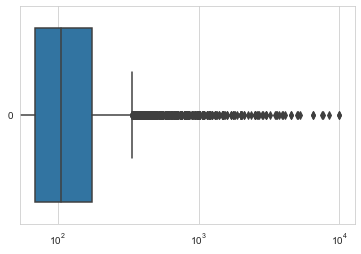

In [33]:
sns.boxplot(data=df.price, orient="h").set(xscale="log");

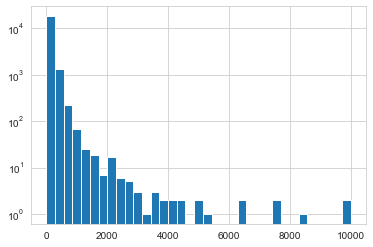

In [41]:
fig, ax = plt.subplots()
# series.hist(ax=ax, bins=100, bottom=0.1)
# ax.set_yscale('log')
df.price.hist(bins=35)
ax.set_yscale('log');

In [45]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19001 non-null  int64         
 1   name                            18994 non-null  object        
 2   host_id                         19001 non-null  int64         
 3   host_name                       18993 non-null  object        
 4   neighbourhood_group             19001 non-null  object        
 5   neighbourhood                   19001 non-null  object        
 6   latitude                        19001 non-null  float64       
 7   longitude                       19001 non-null  float64       
 8   room_type                       19001 non-null  object        
 9   price                           19001 non-null  int64         
 10  minimum_nights                  19001 non-null  int64         
 11  nu

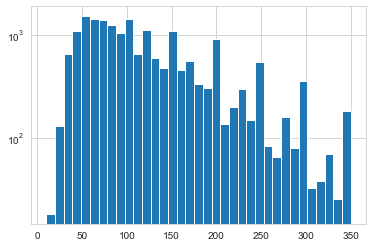

In [47]:
fig, ax = plt.subplots()
# series.hist(ax=ax, bins=100, bottom=0.1)
# ax.set_yscale('log')
df.price.hist(bins=35)
ax.set_yscale('log');

In [48]:
run.finish()